In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pre-python steps
1) search pubmed for topic
2) show 200 items/papers
3) save/export/send to as PMID
4) go to https://pubmed2xl.com/xml/ to convert PMID to xml documents

# Making the Soup
    https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### Reading the data inside the xml

In [3]:
# file to a variable under the name data
with open('../33d4142c-b3f5-11ee-9828-d21848e7cc81.xml', 'r') as f:
    data = f.read()

# Passing the stored data inside
# the beautifulsoup parser, storing
# the returned object 
Bs_data = BeautifulSoup(data, "xml")

### Tag search
 


In [4]:
# Finding all (Tag) instances of tag 
# `title`
#b_unique = Bs_data.find_all('Title')
## `ArticleTitle`
b_unique = Bs_data.find_all('ArticleTitle')
## `Abstract`
ab_unique = Bs_data.find_all('Abstract')
## `PMID`
id_unique = Bs_data.find_all('PMID')
## `DOI`
doi_unique = Bs_data.find_all(attrs={"EIdType" : "doi"})

## Print list with xml id tags
#print(b_unique)

#iterate through ttiles in text format (no id tags)
#for ArticleTitle in b_unique:
#    print(ArticleTitle.text)

### Storing tags

In [5]:
# store titles in list
article = []

# Method 1
for i in b_unique:
    print(i.text)
    if i not in article:
      article.append(i)

# store Abstract in list
abstract = []

# Method 1
for i in ab_unique:
    print(i.text)
    if i not in abstract:
      abstract.append(i)


# store doi in list
doi = []

# Method 1
for i in doi_unique:
    print(i.text)
    if i not in doi:
      doi.append(i)


# store PMID in list
PMID = []

# Method 1
for i in id_unique:
    print(i.text)
    if i not in PMID:
      PMID.append(i)

"Antivirals" in the treatment of adult T cell leukaemia- lymphoma (ATLL).
Rapid T-cell lymphoma progression associated with immune checkpoint inhibitors.
Genome-wide CRISPR screen identifies CDK6 as a therapeutic target in adult T-cell leukemia/lymphoma.
HTLV-1, ATLL, severe hypercalcaemia and HIV-1 co-infection: an overview.
Treatment of adult T-cell leukemia/lymphoma: past, present, and future.
Mogamulizumab Treatment Prior to Allogeneic Hematopoietic Stem Cell Transplantation Induces Severe Acute Graft-versus-Host Disease.
Tumor microenvironment of adult T-cell leukemia/lymphoma.
Pathogenicity and virulence of human T lymphotropic virus type-1 (HTLV-1) in oncogenesis: adult T-cell leukemia/lymphoma (ATLL).
Live attenuated VZV vaccination induces antitumor immunity in ATLL patients.
[Adult T-cell leukemia/lymphoma].
Treatment advances and prognosis for patients with adult T-cell leukemia-lymphoma.
Mogamulizumab for the Treatment of Adult T-cell Leukemia/Lymphoma.
Treatment of Adult T

### Tabulate XML data

In [6]:
#Display the important information such as article title, doi, PMID, and Abstract in tabular form from soup(ed) data
print('-'.center(47, '-'))
print('|' + 'Artical Title'.center(15) + '|' + ' DOI ' + '|' + 'PMID'.center(11) + '|'+ 'Abstract'.center(11) + '|')
for i in range(0, len(b_unique)):
    print('-'.center(47, '-'))
    print(
        f'|{b_unique[i].text.center(15)}|{doi_unique[i].text.center(5)}|{id_unique[i].text.center(11)}|{ab_unique[i].text.center(11)}|')
print('-'.center(47, '-'))

-----------------------------------------------
| Artical Title | DOI |    PMID   |  Abstract |
-----------------------------------------------
|"Antivirals" in the treatment of adult T cell leukaemia- lymphoma (ATLL).|10.1007/s11899-012-0139-9|  23093306 |Adult T cell leukaemia / lymphoma (ATLL) is a mature (post thymic) T cell lymphoma caused by the human T-lymphotropic virus type 1 (HTLV-1) infection. Overall survival in the aggressive subtypes (Acute Leukaemia and Lymphomatous) remains poor in part due to chemotherapy resistance. To improve treatment outcome for de novo disease, better induction therapies are required and since the pathogenic agent is known it would seem sensible to target the virus. In a recent meta-analysis the use of zidovudine and interferon alpha (ZDV/IFN) has been associated with improved response rates and prolonged overall survival in leukemic subtypes of ATLL (both acute and Chronic) confirmed in a multivariate analysis. In a more recent UK study the overa

IndexError: list index out of range

# Pandas time

## searching for particular term in the data from above

### Searching through the Title data

In [32]:
df = pd.DataFrame(article)
df = df.rename(columns={0: "Title"})
# Define the regular expression pattern
## Boolean (True/False) seaerch
df1 = df.apply(lambda row: row.astype(str).str.contains('HTLV').any(), axis=1)
## pick out row/articles that  contain above search string
dx = df[df1]
#d = df[df1] # gets titles that do NOT contain serach string
dx

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/construction.py:553: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,Title
3,"[HTLV-1, ATLL, severe hypercalcaemia and HIV-1..."
7,[Pathogenicity and virulence of human T lympho...
17,[Therapeutic approaches for HTLV-1-associated ...
18,[Targeting HTLV-1 activation of NFκB in mouse ...
22,"[Epidemiology, clinical features, and outcome ..."
23,[Zidovudine and interferon-alpha treatment ind...
24,[Neoplastic hematological diseases associated ...
35,[HTLV-I.]
43,[Illuminating (HTLV-1)-induced adult T-cell le...
44,[The human T-cell leukemia virus type 1 (HTLV-...


### Searching through the Absract data

In [27]:
df = pd.DataFrame(abstract)
df = df.rename(columns={0: "Abstract"})
## Boolean (True/False) seaerch
df1 = df.apply(lambda row: row.astype(str).str.contains('HTLV').any(), axis=1)
## pick out abstract row/articles that  contain above search string
d = df[df1]
#d = df[df1] # gets abstract that do NOT contain serach string
d

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/construction.py:553: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,Abstract
0,[[Adult T cell leukaemia / lymphoma (ATLL) is ...
3,[[HIV and HTLV (Human T-ymphotropic Virus) are...
7,[[Adult T-cell leukemia/lymphoma (ATLL) is an ...
8,[[Adult T cell leukemia/lymphoma (ATLL) is a C...
9,[[Adult T-cell leukemia/lymphoma (ATL) is an e...
...,...
152,[[Infection by human T-cell lymphotropic virus...
153,[[Adult T-cell leukemia/lymphoma (ATLL) is a h...
156,[[Human T-cell lymphotropic virus (HTLV) is a ...
158,[[Bowenoid papulosis (BP) is a premalignant co...


### creating df with titles and abstract with search term, and associated PMID adn DOI

In [28]:
art = pd.DataFrame(article)
art = art.rename(columns={0: "Title"})
abst = pd.DataFrame(abstract)
abst = abst.rename(columns={0: "Abstract"})
PMID = pd.DataFrame(PMID)
PMID = PMID.rename(columns={0: "PMID"})
doi = pd.DataFrame(doi)
doi = doi.rename(columns={0: "DOI"})
df = pd.concat([art, abst, doi, PMID], axis=1)
df1 = df.apply(lambda row: row.astype(str).str.contains('HTLV').any(), axis=1)
d = df[df1]
d
#d.groupby('PMID').agg('count')
#d.to_csv('HTLV_pos_PMID.csv')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/internals/construction.py:553: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,Title,Abstract,DOI,PMID
0,"[""Antivirals"" in the treatment of adult T cell...",[[Adult T cell leukaemia / lymphoma (ATLL) is ...,10.1007/s11899-012-0139-9,23093306
3,"[HTLV-1, ATLL, severe hypercalcaemia and HIV-1...",[[HIV and HTLV (Human T-ymphotropic Virus) are...,10.11604/pamj.2018.30.61.13238,35267009
7,[Pathogenicity and virulence of human T lympho...,[[Adult T-cell leukemia/lymphoma (ATLL) is an ...,10.1007/s00262-022-03301-6,34937829
8,[Live attenuated VZV vaccination induces antit...,[[Adult T cell leukemia/lymphoma (ATLL) is a C...,10.11406/rinketsu.64.1032,36593730
9,[[Adult T-cell leukemia/lymphoma].],[[Adult T-cell leukemia/lymphoma (ATL) is an e...,10.3960/jslrt.17008,36181532
...,...,...,...,...
156,[Loss of Foxp3 is associated with CD30 express...,[[Human T-cell lymphotropic virus (HTLV) is a ...,NaN,32859220
158,[Therapeutic potential of arsenic trioxide wit...,[[Bowenoid papulosis (BP) is a premalignant co...,NaN,34755979
164,[[Tax-targeted dendritic cell vaccine therapy ...,[[128 cases of ATL (adult T-cell leukemia/lymp...,NaN,10435685
172,[HTLV-1 and associated adult T-cell leukemia/l...,NaN,NaN,22323448


# Search stats

### import df with common ATLL theraputics

In [ ]:
import re
drugs = pd.read_csv('./ATLL_drugs.txt',encoding='utf-8')
drugs = set(drugs['Compound'])
drugs = pd.DataFrame(drugs)
drugs = drugs.rename(columns={0: "Compound"})

### Search Papers with particular drug targets

In [29]:
#function to search df of papers from above with listof common theraputics.

def drug_search(df, drug_list):
    result_df = pd.DataFrame(columns=[])
    for drug in drug_list['Compound']:
        search_mask = df.apply(lambda row: row.astype(str).str.contains(drug, flags=re.I).any(), axis=1)
        found_rows = df[search_mask]
        found_rows['drugs'] = drug
        result_df = pd.concat([result_df, found_rows], ignore_index=False)
        result_df.sort_index().to_csv('htlv_paper_treatment.csv')
        #print(f'of the {len(d)} origionally isolated studies, only {len(result_df)} contain mention of drug treatment')
    return result_df #,f'of the {len(d)} origionally isolated studies, only {len(result_df)} contain mention of drug treatment \n i.e, {round((len(result_df)/len(d))*100,2)}% '
    
drug_search(d,drugs)

/var/folders/83/9bpqr3h13tggq3czlwty07m40000gs/T/ipykernel_86891/526962152.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  found_rows['drugs'] = drug
/var/folders/83/9bpqr3h13tggq3czlwty07m40000gs/T/ipykernel_86891/526962152.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  found_rows['drugs'] = drug
/var/folders/83/9bpqr3h13tggq3czlwty07m40000gs/T/ipykernel_86891/526962152.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Title,Abstract,DOI,PMID,drugs
55,[Immunosuppressive treatment for mixed connect...,[[Acute T-cell leukemia/lymphoma (ATLL) is a p...,10.1016/j.beha.2019.06.003,29411267,vincristine
78,"[Definition, prognostic factors, treatment, an...",[[Human T lymphotropic virus type 1 (HTLV-1) i...,10.1159/000534040,16444967,vincristine
90,[Rigosertib is more potent than wortmannin and...,[[Adult T-cell leukemia lymphoma (ATLL) is an ...,10.1111/cas.15191,20214446,vincristine
94,[[Progress in the management of ATL].],[[Adult T-cell leukemia/lymphoma (ATL) is a pe...,10.1097/CAD.0000000000000895,36108787,vedotin
126,[Successful treatment with brentuximab vedotin...,[[Human T cell leukemia virus 1 (HTLV-1) cause...,10.1080/0284186X.2019.1691259,25512583,vedotin
55,[Immunosuppressive treatment for mixed connect...,[[Acute T-cell leukemia/lymphoma (ATLL) is a p...,10.1016/j.beha.2019.06.003,29411267,prednisone
90,[Rigosertib is more potent than wortmannin and...,[[Adult T-cell leukemia lymphoma (ATLL) is an ...,10.1111/cas.15191,20214446,prednisone
55,[Immunosuppressive treatment for mixed connect...,[[Acute T-cell leukemia/lymphoma (ATLL) is a p...,10.1016/j.beha.2019.06.003,29411267,etoposide
144,[ATL treatment: is it time to change?],[[The rarity of adult T cell leukemia/lymphoma...,10.2169/internalmedicine.54.1953,28152225,etoposide
55,[Immunosuppressive treatment for mixed connect...,[[Acute T-cell leukemia/lymphoma (ATLL) is a p...,10.1016/j.beha.2019.06.003,29411267,CVAD


### Proportion of drugs in identified papers

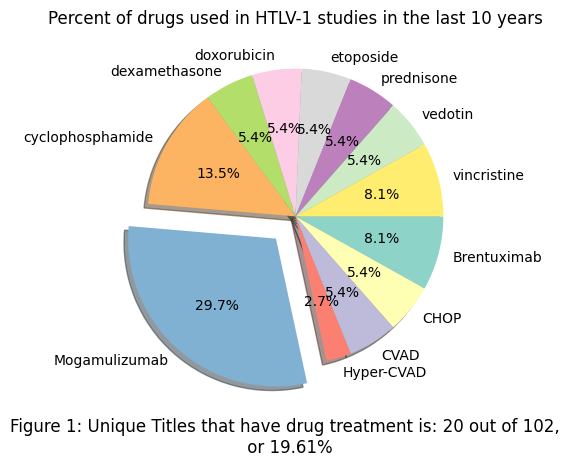

In [41]:
import seaborn as sns 
tretment = pd.read_csv('./htlv_paper_treatment.csv')
ff = tretment.groupby(['drugs']).agg('count')
labels = ['Brentuximab','CHOP','CVAD', 'Hyper-CVAD','Mogamulizumab','cyclophosphamide','dexamethasone','doxorubicin','etoposide','prednisone','vedotin','vincristine']
labels.sort()
explode = (0, 0, 0, 0,0.2, 0, 0, 0,0, 0, 0, 0)
plt.pie(ff.Title,
        explode=explode, labels=labels,colors=sns.color_palette('Set3'), autopct='%1.1f%%',
        counterclock=False, shadow=True)
plt.title('Percent of drugs used in HTLV-1 studies in the last 10 years')
txt= f'Figure 1: Unique Titles that have drug treatment is: {len(set(tretment.Title))} out of {len(d)}, \n or {round((len(set(tretment.Title)) / len(d))*100,2)}%'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

### number of drugs used/mentioned in identifed papers

<BarContainer object of 20 artists>

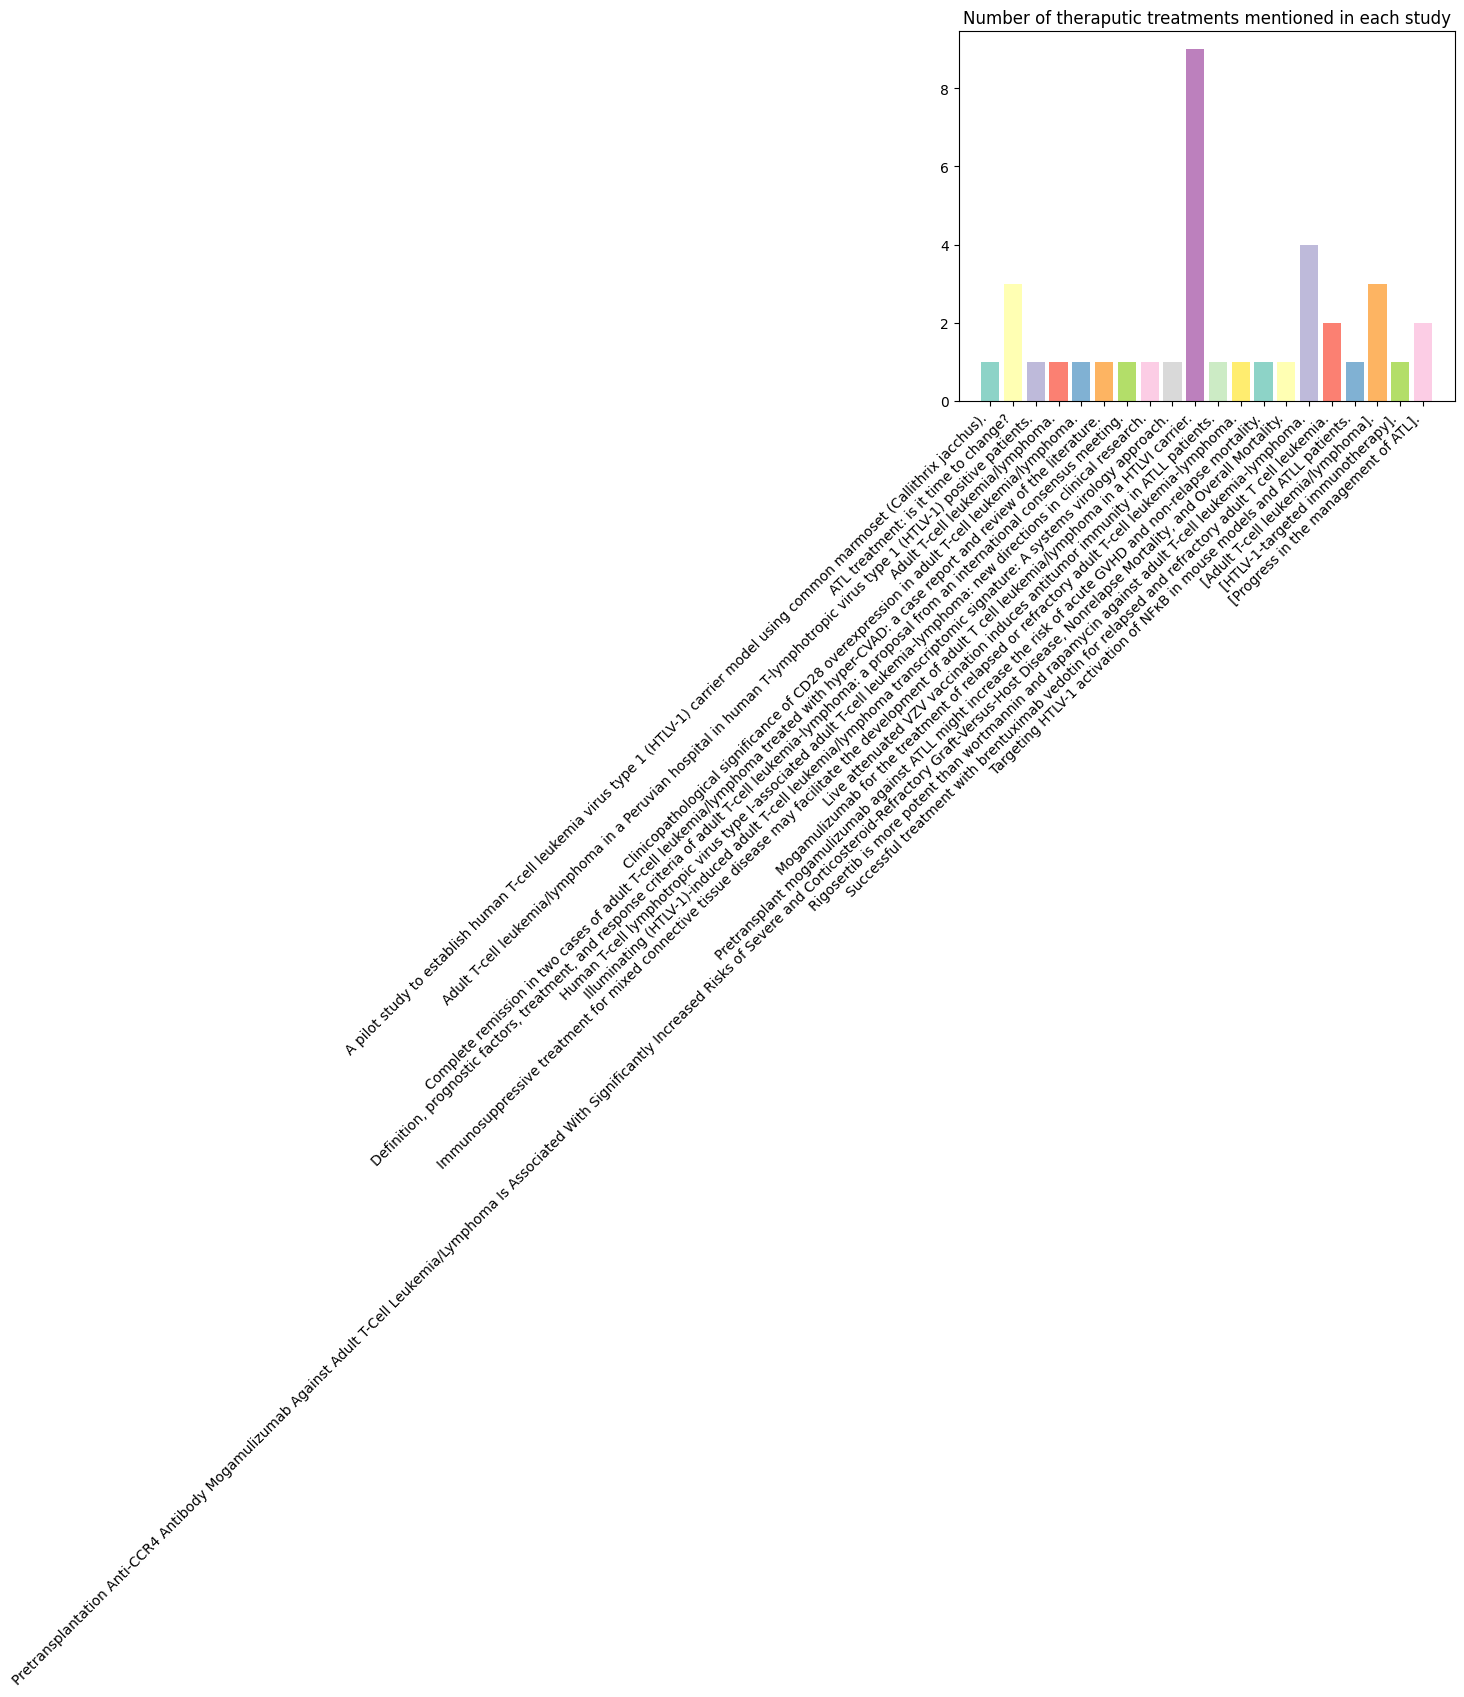

In [66]:
pattern = r'<ArticleTitle>'
tretment['Title'] = tretment['Title'].replace(pattern, '', regex=True)
pattern = r'</ArticleTitle>'
tretment['Title'] = tretment['Title'].replace(pattern, '', regex=True)
ff = tretment.groupby(['Title'],as_index=False).agg('count')

# Use regular expressions to remove special characters from the 'text' column
plt.xticks(rotation=45, ha='right')
txt= f'Number of theraputic treatments mentioned in each study'
plt.title('Number of theraputic treatments mentioned in each study')
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.bar(ff.Title,ff.drugs, label=ff.Title,color=sns.color_palette('Set3'))